In [1]:
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('Dataframe_distance.csv')

In [4]:
df.shape

(1810019, 55)

In [5]:
# Datetime
df['DateOfCall'] = pd.to_datetime(df['DateOfCall'])
df['Year'] = df['DateOfCall'].dt.year
df['Month'] = df['DateOfCall'].dt.month_name()
df['Weekday'] = df['DateOfCall'].dt.day_name()

df.head()

,IncidentNumber,DateOfCall,CalYear_x,TimeOfCall,HourOfCall_x,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,PlusCode_Code,PlusCode_Description,DelayCodeId,DelayCode_Description,Latitude_station,Longitude_station,Distance,Year,Month,Weekday
0,000001-01012016,2016-01-01,2016,00:03:17,0,False Alarm,False alarm - Good intent,No,Dwelling,House - single occupancy,...,Initial,Initial Mobilisation,0.0,0,51.487426,0.091466,4.814100,2016,January,Friday
1,000003-01012016,2016-01-01,2016,00:04:41,0,Fire,Primary Fire,No,Dwelling,House - single occupancy,...,Initial,Initial Mobilisation,0.0,0,51.487426,0.091466,4.814100,2016,January,Friday
2,000003-01012016,2016-01-01,2016,00:04:41,0,Fire,Primary Fire,No,Dwelling,House - single occupancy,...,Initial,Initial Mobilisation,0.0,0,51.487426,0.091466,4.814100,2016,January,Friday
3,000005-01012016,2016-01-01,2016,00:07:17,0,Special Service,Special Service,RTC,Road Vehicle,Multiple Vehicles,...,Initial,Initial Mobilisation,0.0,0,51.586507,-0.127303,1.918326,2016,January,Friday
4,000005-01012016,2016-01-01,2016,00:07:17,0,Special Service,Special Service,RTC,Road Vehicle,Multiple Vehicles,...,Initial,Initial Mobilisation,0.0,0,51.586507,-0.127303,1.918326,2016,January,Friday


In [6]:
#supprimer les colonnes
colonnes_a_supprimer = ["IncidentNumber", "DateOfCall", "CalYear_x", "HourOfCall_x", "TimeOfCall", 'SecondPumpArriving_AttendanceTime', 'FirstPumpArriving_AttendanceTime',"SecondPumpArriving_DeployedFromStation", "StopCodeDescription", "PropertyType", "Postcode_district", "IncGeo_BoroughCode", "ProperCase", "IncGeo_WardCode", "IncGeo_WardName", 'IncGeo_WardNameNew', 'FRS', 'NumStationsWithPumpsAttending', 'NumPumpsAttending', 'PumpCount', 'PumpMinutesRounded', 'Notional Cost (£)', 'NumCalls', 'CalYear_y', 'HourOfCall_y', 'ResourceMobilisationId', 'Resource_Code', 'PerformanceReporting', 'DateAndTimeMobile', 'DateAndTimeArrived', 'AttendanceTimeSeconds', 'DateAndTimeLeft', 'DeployedFromStation_Code', 'DeployedFromStation_Name', 'DeployedFromLocation', 'PumpOrder', 'PlusCode_Code', 'PlusCode_Description', 'DelayCodeId', "Latitude", "Longitude", "Latitude_station", "Longitude_station", "DateAndTimeMobilised",]
df = df.drop(columns=colonnes_a_supprimer)

In [7]:
df.head()

,IncidentGroup,SpecialServiceType,PropertyCategory,AddressQualifier,IncGeo_BoroughName,IncidentStationGround,FirstPumpArriving_DeployedFromStation,TurnoutTimeSeconds,TravelTimeSeconds,DelayCode_Description,Distance,Year,Month,Weekday
0,False Alarm,No,Dwelling,Correct incident location,GREENWICH,Plumstead,Plumstead,44.0,121.0,0,4.814100,2016,January,Friday
1,Fire,No,Dwelling,On land associated with building,GREENWICH,Plumstead,Plumstead,61.0,98.0,0,4.814100,2016,January,Friday
2,Fire,No,Dwelling,On land associated with building,GREENWICH,Plumstead,Plumstead,50.0,284.0,0,4.814100,2016,January,Friday
3,Special Service,RTC,Road Vehicle,In street outside gazetteer location,HARINGEY,Hornsey,Hornsey,34.0,238.0,0,1.918326,2016,January,Friday
4,Special Service,RTC,Road Vehicle,In street outside gazetteer location,HARINGEY,Hornsey,Hornsey,74.0,294.0,0,1.918326,2016,January,Friday


In [8]:
# Supprimer toutes les lignes où TravelTimeSeconds est égal à zéro
df = df[df['TravelTimeSeconds'] != 0]

# Réinitialiser les index après la suppression des lignes
df.reset_index(drop=True, inplace=True)

In [9]:
# Valeur minimale et maximale
min_travel_time = min(df['TravelTimeSeconds'])
max_travel_time = max(df['TravelTimeSeconds'])

print("Valeur minimale de TravelTimeSeconds :", min_travel_time)
print("Valeur maximale de TravelTimeSeconds :", max_travel_time)

min_travel_time_min = min(df['TravelTimeSeconds']) / 60
max_travel_time_min = max(df['TravelTimeSeconds']) / 60

print("Valeur minimale de TravelTimeSeconds en minutes :", min_travel_time_min)
print("Valeur maximale de TravelTimeSeconds en minutes :", max_travel_time_min)

Valeur minimale de TravelTimeSeconds : 1.0
Valeur maximale de TravelTimeSeconds : 1195.0
Valeur minimale de TravelTimeSeconds en minutes : 0.016666666666666666
Valeur maximale de TravelTimeSeconds en minutes : 19.916666666666668


In [10]:
# Calcul de la moyenne
import numpy as np
mean_travel_time = np.mean(df['TravelTimeSeconds'])
print("Moyenne de TravelTimeSeconds :", mean_travel_time)

# Calcul des quartiles
quartiles = np.percentile(df['TravelTimeSeconds'], [25, 50, 75])
q1, q2, q3 = quartiles
print("Premier quartile (Q1) :", q1)
print("Deuxième quartile (médiane, Q2) :", q2)
print("Troisième quartile (Q3) :", q3)

mean_travel_time_minutes = mean_travel_time / 60
q1_minutes = q1 / 60
q2_minutes = q2 / 60
q3_minutes = q3 / 60

print("Moyenne de TravelTimeSeconds en minutes :", mean_travel_time_minutes)
print("Premier quartile (Q1) en minutes :", q1_minutes)
print("Deuxième quartile (médiane, Q2) en minutes :", q2_minutes)
print("Troisième quartile (Q3) en minutes :", q3_minutes)

Moyenne de TravelTimeSeconds : 277.4228605577073
Premier quartile (Q1) : 180.0
Deuxième quartile (médiane, Q2) : 254.0
Troisième quartile (Q3) : 346.0
Moyenne de TravelTimeSeconds en minutes : 4.623714342628455
Premier quartile (Q1) en minutes : 3.0
Deuxième quartile (médiane, Q2) en minutes : 4.233333333333333
Troisième quartile (Q3) en minutes : 5.766666666666667


In [11]:
cat_var = list(df.select_dtypes(include=['object']).columns) 
num_var = list(df.select_dtypes(exclude=['object', 'datetime64']).columns)

In [12]:
# Affichage des valeurs uniques pour chaque variable catégorielle
for var in cat_var:
    unique_values = df[var].unique()
    print(f'\nValeurs uniques pour {var}:\n{unique_values}')


Valeurs uniques pour IncidentGroup:
['False Alarm' 'Fire' 'Special Service']

Valeurs uniques pour SpecialServiceType:
['No' 'RTC' 'Flooding' 'Lift Release' 'Making Safe (not RTC)'
 'Effecting entry/exit' 'Spills and Leaks (not RTC)'
 'Other Transport incident' 'No action (not false alarm)'
 'Assist other agencies' 'Removal of objects from people' 'Advice Only'
 'Evacuation (no fire)' 'Suicide/attempts' 'Animal assistance incidents'
 'Hazardous Materials incident' 'Medical Incident' 'Stand By'
 'Other rescue/release of persons' 'Rescue or evacuation from water'
 'Medical Incident - Co-responder' 'Water provision']

Valeurs uniques pour PropertyCategory:
['Dwelling' 'Road Vehicle' 'Outdoor' 'Other Residential' 'Non Residential'
 'Outdoor Structure' 'Rail Vehicle' 'Aircraft' 'Boat']

Valeurs uniques pour AddressQualifier:
['Correct incident location' 'On land associated with building'
 'In street outside gazetteer location' 'Within same building'
 'In street close to gazetteer location'

In [13]:
# Créer un dictionnaire de groupes logiques pour specialservicetype
group_mapping = {
    'Pas de service special' : ['No', 'No action (not false alarm)'],
    'RTC': ['RTC'],
    "Réponse d'urgence": ['Medical Incident', 'Medical Incident - Co-responder', 'Suicide/attempts', 'Rescue'],
    'HazMat et évacuation': ['Spills and Leaks (not RTC)', 'Hazardous Materials incident', 'Evacuation (no fire)'],
    'Accès et sauvetage ': ['Lift Release', 'Effecting entry/exit', 'Removal of objects from people'],
    'Eau' : ['Flooding', 'Rescue or evacuation from water', 'Water provision'],
    'Autres': ['Flooding', 'Making Safe (not RTC)', 'Other Transport incident',
                    'Assist other agencies', 'Advice Only', 'Stand By', 'Other rescue/release of persons']
}

df['SpecialServiceType'] = df['SpecialServiceType'].apply(lambda x: next((group for group, values in group_mapping.items() if x in values), x))

In [14]:
# Créer un dictionnaire de groupes logiques pour propertycategory
group_mapping2 = {
    'Résidentiel' : ['Dwelling', 'Other Residential'], 
    'Véhicule' : ['Road Vehicle', 'Rail Vehicle', 'Aircraft', 'Boat'],
    'Extérieur' : ['Outdoor', 'Non Residential', 'Outdoor Structure']
}

df['PropertyCategory'] = df['PropertyCategory'].apply(lambda x: next((group for group, values in group_mapping2.items() if x in values), x))

In [15]:
# Créer un dictionnaire de groupes logiques pour AddressQualifier
group_mapping3 = {
    'Localisation précise' : ['Correct incident location', 'Within same building', 'Nearby address - no building in street', 'Nearby address - street not listed in gazetteer'],
    'Véhicule ou rue' : ['On land associated with building', 'In street outside gazetteer location', 'In street close to gazetteer location', 'In street remote from gazetteer location'],
    'Extérieur - Eau' : ['Open land/water - nearest gazetteer location'],
    'Extérieur - Route' : ['On motorway / elevated road'],
    'Extérieur - Ferroviaire' : ['Railway land or rolling stock']
}

df['AddressQualifier'] = df['AddressQualifier'].apply(lambda x: next((group for group, values in group_mapping3.items() if x in values), x))

In [16]:
# Créer un dictionnaire de groupes logiques pour IncGeo_BoroughName
group_mapping4 = {
    'SUD EST' : ['BEXLEY', 'BROMLEY', 'GREENWICH', 'LEWISHAM', 'SOUTHWARK'],
    'NORD EST' : ['HAVERING', 'REDBRIDGE', 'NEWHAM', 'BARKING AND DAGENHAM', 'WALTHAM FOREST', 'TOWER HAMLETS'],
    'NORD' : ['ENFIELD', 'BARNET', 'HARINGEY', 'HACKNEY', 'ISLINGTON', 'CAMDEN', 'WESTMINSTER'],
    'OUEST' : ['HARROW', 'HILLINGDON', 'BRENT', 'EALING', 'HOUNSLOW', 'HAMMERSMITH AND FULHAM', 'KENSINGTON AND CHELSEA'],
    'SUD OUEST' : ['RICHMOND UPON THAMES', 'KINGSTON UPON THAMES', 'WANDSWORTH', 'MERTON', 'LAMBETH', 'SUTTON', 'CROYDON'],
    'CITY' : ['CITY OF LONDON']
}

df['IncGeo_BoroughName'] = df['IncGeo_BoroughName'].apply(lambda x: next((group for group, values in group_mapping4.items() if x in values), x))

In [17]:
# Créer un dictionnaire de groupes logiques pour les localisations
group_mapping5 = {
    "SUD EST": ["Deptford", "Homerton", "Tooting", "Stratford", "Mitcham", "Brixton", "Peckham", "Poplar", "Acton", "West Hampstead", "Millwall", "Southgate", "Tottenham", "Woodford", "East Ham", "Leyton", "Wimbledon", "Ilford", "Sidcup", "Kentish Town", "Old Kent Road", "Plaistow", "Eltham", "New Malden", "East Greenwich", "Euston"],
    "NORD EST": ["Plumstead", "Hornsey", "Southall", "Enfield", "Edmonton", "Hillingdon", "Norbury", "Leytonstone", "Heston", "Twickenham", "Barking", "Romford", "Addington", "Bexley", "Lee Green", "Sutton", "Erith", "Chingford", "Biggin Hill", "New Cross", "Mill Hill", "Purley", "Wallington", "Harold Hill", "Hainault", "Dagenham", "Staines", "Dartford", "Fordbridge", "Hornchurch"],
    "NORD": ["Islington", "North Kensington", "Paddington", "Holloway", "Shoreditch", "Wembley", "Hendon", "Stoke Newington", "Finchley", "Walthamstow", "Willesden", "Lewisham", "Northolt", "Orpington", "Bethnal Green", "Woodside", "Forest Hill", "West Norwood", "Hertfordshire"],
    "OUEST": ["Park Royal", "Kensington", "Fulham", "Chiswick", "Ruislip", "Feltham", "Harrow", "Ealing", "Richmond"],
    "SUD OUEST": ["Lambeth", "Clapham", "Putney", "Battersea", "Kingston", "Hayes", "Beckenham", "West Norwood", "Surbiton"],
    "CITY": ["Soho", "Whitechapel", "Dowgate", "Dockhead", "Shadwell", "Croydon", "Wennington", "Heathrow", "Chelsea", "Hammersmith", "Greenwich", "Wandsworth", "Barnet", "Stanmore", "Bromley"]
}

df['IncidentStationGround'] = df['IncidentStationGround'].apply(lambda x: next((group for group, values in group_mapping5.items() if x in values), x))
df['FirstPumpArriving_DeployedFromStation'] = df['FirstPumpArriving_DeployedFromStation'].apply(lambda x: next((group for group, values in group_mapping5.items() if x in values), x))

In [18]:
# Créer un dictionnaire de groupes logiques pour les retards
group_mapping6 = {
    'Pas de retard' : ['0'],
    'Problème d\'adresse': ['Address incomplete/wrong'],
    'Retenu': ['Arrived but held up - Other reason', 'Not held up'],
    'Problèmes liés au trafic ou aux conditions météorologiques': ['Traffic calming measures', 'Traffic, roadworks, etc', 'Weather conditions'],
    'Problèmes lors de la mobilisation': ['At drills when mobilised', 'Mob/Radio problems when mobilised', 'On outside duty when mobilised'],
    'Défaut d\'appareil/équipement': ['Appliance/Equipment defect']
}

df['DelayCode_Description'] = df['DelayCode_Description'].apply(lambda x: next((group for group, values in group_mapping6.items() if x in values), x))

In [19]:
df.head()

,IncidentGroup,SpecialServiceType,PropertyCategory,AddressQualifier,IncGeo_BoroughName,IncidentStationGround,FirstPumpArriving_DeployedFromStation,TurnoutTimeSeconds,TravelTimeSeconds,DelayCode_Description,Distance,Year,Month,Weekday
0,False Alarm,Pas de service special,Résidentiel,Localisation précise,SUD EST,NORD EST,NORD EST,44.0,121.0,Pas de retard,4.814100,2016,January,Friday
1,Fire,Pas de service special,Résidentiel,Véhicule ou rue,SUD EST,NORD EST,NORD EST,61.0,98.0,Pas de retard,4.814100,2016,January,Friday
2,Fire,Pas de service special,Résidentiel,Véhicule ou rue,SUD EST,NORD EST,NORD EST,50.0,284.0,Pas de retard,4.814100,2016,January,Friday
3,Special Service,RTC,Véhicule,Véhicule ou rue,NORD,NORD EST,NORD EST,34.0,238.0,Pas de retard,1.918326,2016,January,Friday
4,Special Service,RTC,Véhicule,Véhicule ou rue,NORD,NORD EST,NORD EST,74.0,294.0,Pas de retard,1.918326,2016,January,Friday


In [20]:
# Affichage des valeurs uniques pour chaque variable catégorielle
for var in cat_var:
    unique_values = df[var].unique()
    print(f'\nValeurs uniques pour {var}:\n{unique_values}')


Valeurs uniques pour IncidentGroup:
['False Alarm' 'Fire' 'Special Service']

Valeurs uniques pour SpecialServiceType:
['Pas de service special' 'RTC' 'Eau' 'Accès et sauvetage ' 'Autres'
 'HazMat et évacuation' "Réponse d'urgence" 'Animal assistance incidents']

Valeurs uniques pour PropertyCategory:
['Résidentiel' 'Véhicule' 'Extérieur']

Valeurs uniques pour AddressQualifier:
['Localisation précise' 'Véhicule ou rue' 'Extérieur - Eau'
 'Extérieur - Route' 'Extérieur - Ferroviaire']

Valeurs uniques pour IncGeo_BoroughName:
['SUD EST' 'NORD' 'NORD EST' 'SUD OUEST' 'OUEST' 'CITY']

Valeurs uniques pour IncidentStationGround:
['NORD EST' 'SUD EST' 'CITY' 'SUD OUEST' 'OUEST' 'NORD']

Valeurs uniques pour FirstPumpArriving_DeployedFromStation:
['NORD EST' 'SUD EST' 'NORD' 'CITY' 'SUD OUEST' 'OUEST']

Valeurs uniques pour DelayCode_Description:
['Pas de retard' "Problème d'adresse" 'Retenu'
 'Problèmes liés au trafic ou aux conditions météorologiques'
 'Problèmes lors de la mobilisation'

In [21]:
print(df.isnull().sum())

IncidentGroup                            0
SpecialServiceType                       0
PropertyCategory                         0
AddressQualifier                         0
IncGeo_BoroughName                       0
IncidentStationGround                    0
FirstPumpArriving_DeployedFromStation    0
TurnoutTimeSeconds                       0
TravelTimeSeconds                        0
DelayCode_Description                    0
Distance                                 0
Year                                     0
Month                                    0
Weekday                                  0
dtype: int64


In [22]:
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [23]:
# Définition des classes en fonction des intervalles de temps spécifiques
def assign_class_new(value):
    if value < q1:
        return 0  
    elif q1 <= value < q2:
        return 1  
    elif q2 <= value < q3:
        return 2  
    else:
        return 3  
# Ajouter une colonne "Class" au DataFrame avec les nouvelles classes assignées
df['Class'] = df['TravelTimeSeconds'].apply(assign_class_new)
# Séparer les données
X = df.drop(['TravelTimeSeconds', 'Class'], axis=1)
y = df['Class']

cat_var = list(X.select_dtypes(include=['object']).columns) 
num_var = list(X.select_dtypes(exclude=['object', 'datetime64']).columns)

# Diviser les données en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encodage one-hot
encoder = OneHotEncoder()
X_train_encoded = encoder.fit_transform(X_train[cat_var]).toarray()
X_test_encoded = encoder.transform(X_test[cat_var]).toarray()

# StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_var])
X_test_scaled = scaler.transform(X_test[num_var])
X_train_final = np.concatenate((X_train_encoded, X_train_scaled), axis=1)
X_test_final = np.concatenate((X_test_encoded, X_test_scaled), axis=1)

# Modèle
model = RandomForestClassifier(random_state=42)
model.fit(X_train_final, y_train)
predictions = model.predict(X_test_final)

# Calculer la précision du modèle
accuracy = accuracy_score(y_test, predictions)
print("Précision du modèle :", accuracy) 

Précision du modèle : 0.75173723402491


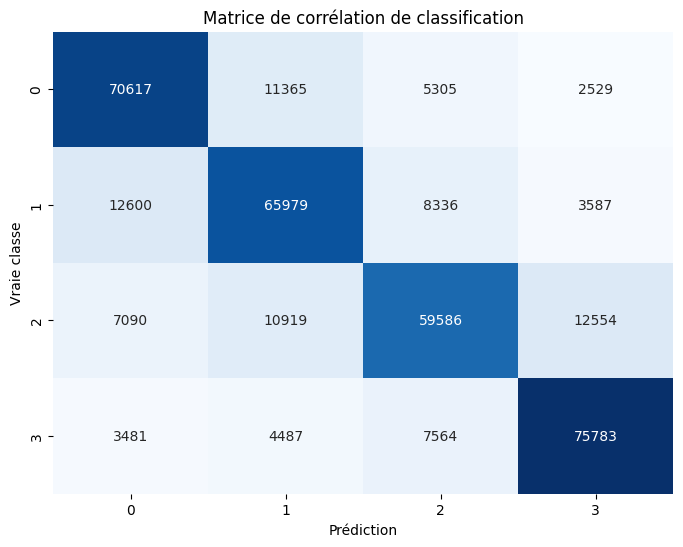

Rapport de classification :
               precision    recall  f1-score   support

           0       0.75      0.79      0.77     89816
           1       0.71      0.73      0.72     90502
           2       0.74      0.66      0.70     90149
           3       0.80      0.83      0.82     91315

    accuracy                           0.75    361782
   macro avg       0.75      0.75      0.75    361782
weighted avg       0.75      0.75      0.75    361782



In [24]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Matrice de corrélation de classification
conf_matrix = confusion_matrix(y_test, predictions)

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Prédiction')
plt.ylabel('Vraie classe')
plt.title('Matrice de corrélation de classification')
plt.show()

# Rapport de classification
class_report = classification_report(y_test, predictions)
print("Rapport de classification :\n", class_report)

In [25]:
predictions = model.predict(X_test_final)

# Créer un DataFrame avec les données de test, les valeurs prédites et les valeurs réelles
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

# Afficher quelques exemples
print("Exemples de données prédites vs réelles :")
results_df.head(10)

Exemples de données prédites vs réelles :


,Actual,Predicted
967472,0,0
313784,0,0
1681317,0,0
997793,2,2
886078,1,1
1057716,0,0
996166,1,1
437037,2,2
864254,1,1
1384095,2,2


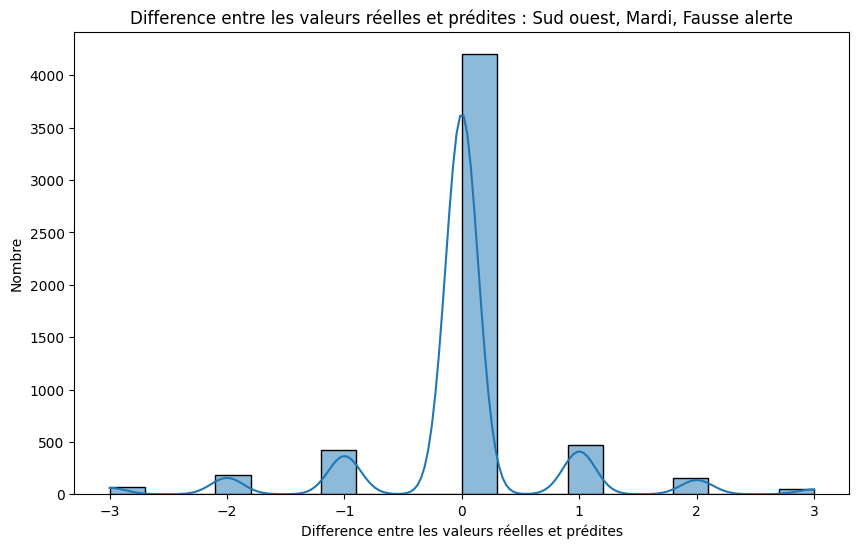

In [26]:
# Choisir un quartier spécifique
borough_name = 'SUD OUEST'
day = 'Tuesday'
incident_group = 'False Alarm'
# Filtrer les données de test pour ce quartier spécifique
borough_data = X_test[(X_test['IncGeo_BoroughName'] == borough_name) & (X_test['Weekday'] == day) & (X_test['IncidentGroup'] == incident_group)]

# Récupérer les index des lignes correspondant au quartier spécifique dans les données de test
borough_indices = borough_data.index

# Filtrer les résultats pour les index correspondant au quartier spécifique
borough_results = results_df.loc[borough_indices]

# Tracer la différence entre les valeurs prédites et réelles pour ce quartier
plt.figure(figsize=(10, 6))
sns.histplot(borough_results['Predicted'] - borough_results['Actual'], bins=20, kde=True)
plt.xlabel('Difference entre les valeurs réelles et prédites')
plt.ylabel('Nombre')
plt.title('Difference entre les valeurs réelles et prédites : Sud ouest, Mardi, Fausse alerte')
plt.show()

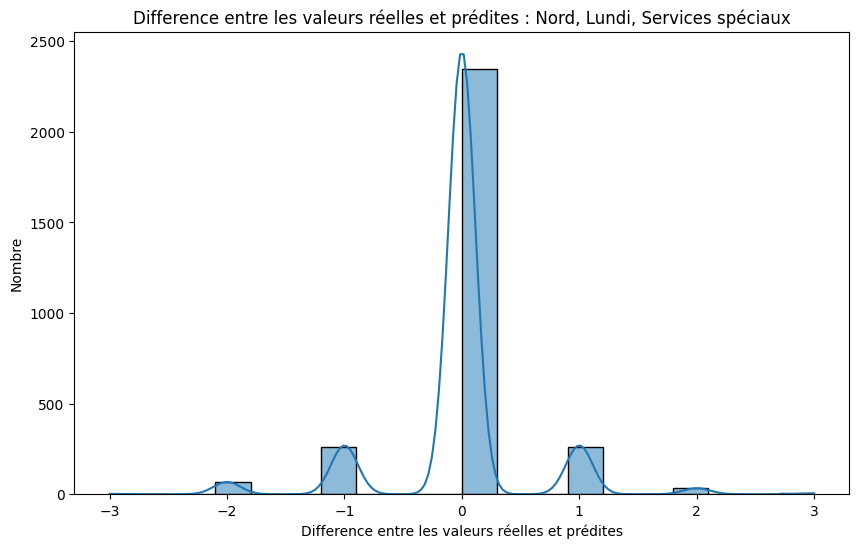

In [27]:
# Choisissez un quartier spécifique
borough_name = 'NORD'
day = 'Monday'
incident_group = 'Special Service'
# Filtrer les données de test pour ce quartier spécifique
borough_data = X_test[(X_test['IncGeo_BoroughName'] == borough_name) & (X_test['Weekday'] == day) & (X_test['IncidentGroup'] == incident_group)]

# Récupérer les index des lignes correspondant au quartier spécifique dans les données de test
borough_indices = borough_data.index

# Filtrer les résultats pour les index correspondant au quartier spécifique
borough_results = results_df.loc[borough_indices]

# Tracer la différence entre les valeurs prédites et réelles pour ce quartier
plt.figure(figsize=(10, 6))
sns.histplot(borough_results['Predicted'] - borough_results['Actual'], bins=20, kde=True)
plt.xlabel('Difference entre les valeurs réelles et prédites')
plt.ylabel('Nombre')
plt.title('Difference entre les valeurs réelles et prédites : Nord, Lundi, Services spéciaux')
plt.show()

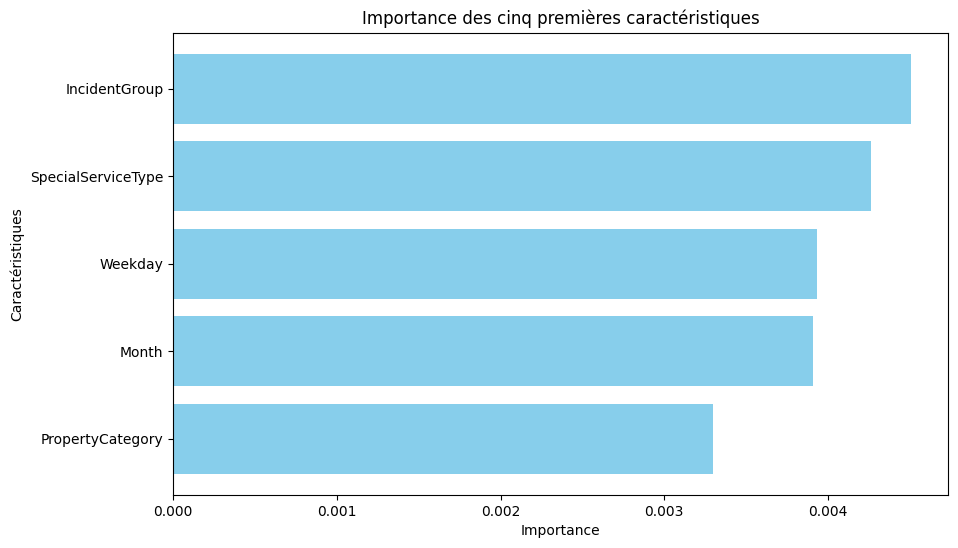

In [28]:
import matplotlib.pyplot as plt

feature_importances = model.feature_importances_

feature_names = list(df.drop(['TravelTimeSeconds', 'Class'], axis=1).columns)

# Récupérer les cinq premières caractéristiques les plus importantes
top_features = [feature for _, feature in sorted(zip(feature_importances, feature_names), reverse=True)[:5]]

# Récupérer les importances des cinq premières caractéristiques
top_importances = [importance for importance, _ in sorted(zip(feature_importances, feature_names), reverse=True)[:5]]

# Créer un diagramme à barres pour visualiser l'importance des cinq premières caractéristiques
plt.figure(figsize=(10, 6))
bars = plt.barh(top_features, top_importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Caractéristiques')
plt.title('Importance des cinq premières caractéristiques')

plt.gca().invert_yaxis()

plt.show()

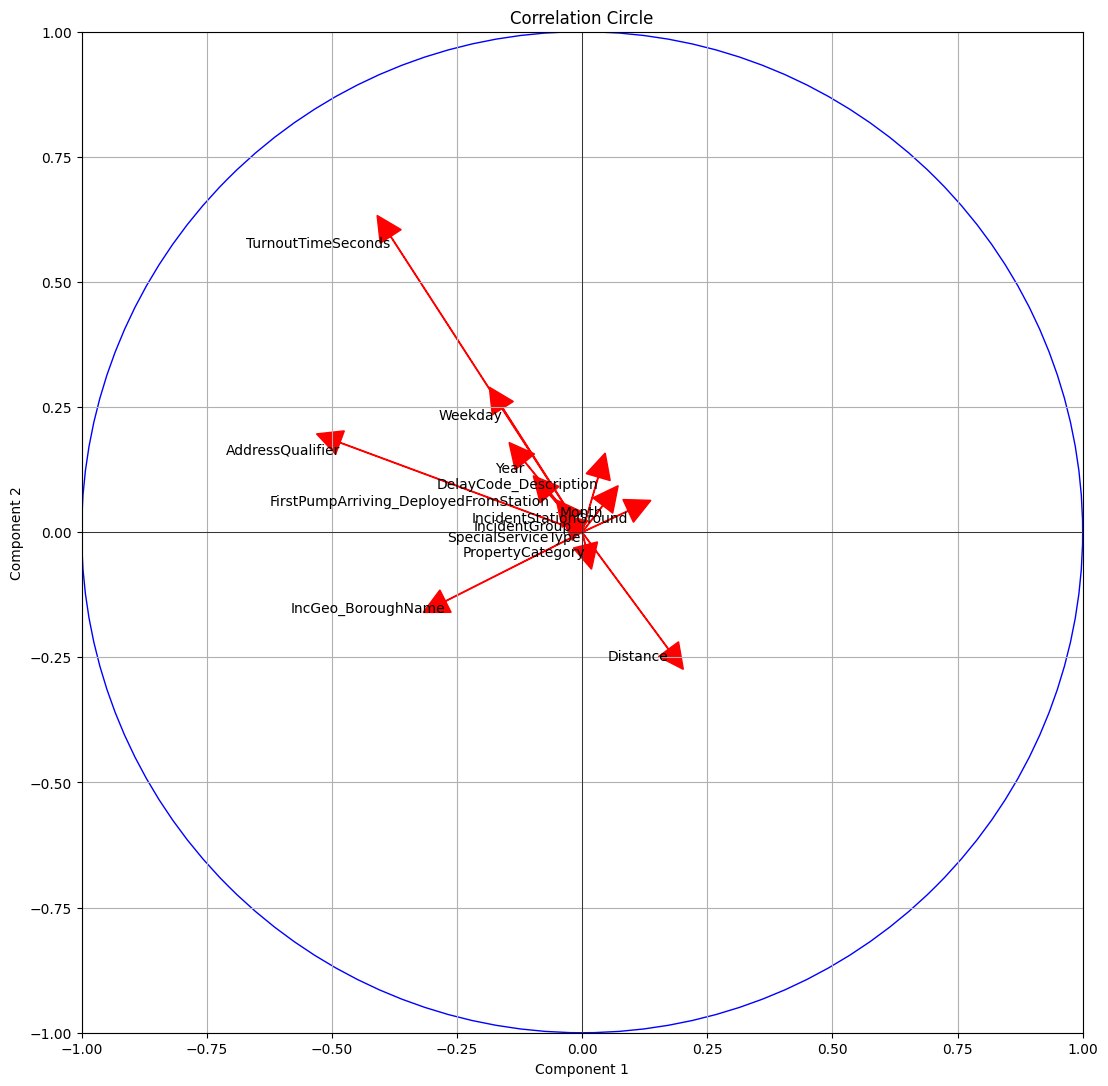

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=13)
X_train_pca = pca.fit_transform(X_train_final)
X_test_pca = pca.transform(X_test_final)

# Tracer le cercle de corrélation
explained_variance_ratio = pca.explained_variance_ratio_
principal_components = pca.components_

# Préparation des informations sur les composantes principales
principal_components_reformatted = [(pc[0], pc[1]) for pc in principal_components]
pc_infos = list(zip(explained_variance_ratio, principal_components_reformatted))

# Labels pour les variables (concaténation des noms des variables catégorielles et numériques)
cat_var = list(X.select_dtypes(include=['object']).columns)
num_var = list(X.select_dtypes(exclude=['object', 'datetime64']).columns)
labels = cat_var + num_var

# Tracer le cercle de corrélation
fig, ax = plt.subplots(figsize=(13, 13)) 
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.set_aspect('equal', 'box')

circle = plt.Circle((0, 0), 1, color='blue', fill=False)
ax.add_artist(circle)
    
# Tracer les flèches et les labels
for i, (explained_variance_ratio, coordinates) in enumerate(pc_infos):
    x, y = coordinates
    ax.arrow(0, 0, x, y, head_width=0.05, head_length=0.05, fc='r', ec='r')

# Afficher les labels pour chaque variable
for label, (x, y) in zip(labels, principal_components_reformatted):
    ax.text(x, y, label, ha='right', va='top')

# Configurer les axes et le titre
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.grid()
plt.title('Correlation Circle')
plt.show()